# 1. 基于Logistic回归和Sigmoid函数的分类

最优化算法——Logistic回归

优点：计算代价不高，易于理解和实现

缺点：容易欠拟合，分类精度可能不高

使用数据类型：数值型和标称型数据

Logistic回归的一般过程：

（1）收集数据：采用任意方法收集数据

（2）准备数据：由于需要进行距离计算，因此要求数据类型为数值型。另外，结构化数据格式则最佳

（3）分析数据：采用任意方法对数据进行分析

（4）训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数

（5）测试算法：一旦训练步骤完成，分类将会很快

（6）使用算法：首先，输入一些数据并将其转换成对应的结构化数值；接着，基于训练好的回归系数进行回归计算，判定它们属于哪个类别

## 1.1 Sigmoid函数

我们想要的函数应该是，能接受所有的输入然后预测出类别。例如，在两个类的情况下，上述函数输出0或1。

具有这种性质的函数，称为海维赛德阶跃函数（Heaviside step function），或者直接称为单位阶跃函数，然而其问题是：

该函数在跳跃点上从0瞬间跳跃到1，这个瞬间跳跃过程有时很难处理。

有一个函数也有类似性质，且数学上更易处理，这就是Sigmoid函数：

$$ \sigma(z) = \frac{1}{1+e^{-z}} $$

当$x$为0时，Sigmod函数值为0.5。随着$x$的增大，对应的Sigmoid值将逼近于1；随着$x$的减小，Sigmoid值将逼近于0。

因此，为了实现Logistic回归分类器，我们可以在每个特征上都乘以一个回归系数，然后把所有的结果值相加，将这个总和代入Sigmoid函数中，

从而得到一个范围在0-1之间的数值，任何大于0.5的数据被分入1类，小于0.5即被归入0类。

那么，最佳回归系数是多少？

# 2. 基于最优化方法的最佳回归系数确定

Sigmoid函数的输入记为$z$，由下面的公式得出：

$$ z = w_0x_0 + w_1x_1 + w_2x_2 + \cdots + w_nx_n $$

如果采用向量的写法，上述公式写为：

$$ z = w^Tx $$

它表示将这两个数值向量对应元素相乘然后全部加起来得到$z$值，其中向量$x$是分类器的输入数据，向量$w$是我们要寻找的最佳参数（系数）

## 2.1 梯度上升法

梯度上升法基于的思想是：要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻。

如果梯度记为$\bigtriangledown$，则函数$f(x,y)$的梯度由下式表示：

$$ \bigtriangledown f(x,y) = \left[ \begin{array} {}
\frac {\partial f(x,y)} {\partial x}\\
\frac {\partial f(x,y)} {\partial y}\\
\end{array} \right] $$

这个梯度意味着要沿$x$的方向移动$\frac {\partial f(x,y)} {\partial x}$，沿$y$的方向移动$\frac {\partial f(x,y)} {\partial y}$。

梯度算子总是指向函数值增长最快的方向，而移动量的大小称为步长，记作$\alpha$，用向量表示的话，梯度上升算法的迭代公式如下：

$$ w:= w + \alpha \bigtriangledown_w f(w) $$

这个公式将一直被迭代执行，直至到达某个停止条件为止，比如迭代次数达到某个指定值或算法达到某个可以允许的误差范围。

## 2.2 训练算法：使用梯度上升找到最佳参数

梯度上升法的伪代码如下：

    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha x gradient更新回归系数的向量
        返回回归系数


In [1]:
from numpy import *

def loadDataSet():
    dataMat = []
    labelMat = []
    with open('testSet.txt') as fr:
        for line in fr.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
    return dataMat, labelMat

def sigmoid(inX):
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):
    dataMatrix = mat(dataMatIn)          #转换为NumPy矩阵数据类型
    labelMat = mat(classLabels).T
    m, n = shape(dataMatrix)
    alpha = 0.001
    maxCycles = 500
    weights = ones((n, 1))
    for k in range(maxCycles):
        h = sigmoid(dataMatrix * weights)                  #矩阵相乘
        error = labelMat - h
        weights = weights + alpha * dataMatrix.T * error
    return weights

dataArr, labelMat = loadDataSet()
gradAscent(dataArr, labelMat)

matrix([[ 4.12414349],
        [ 0.48007329],
        [-0.6168482 ]])

## 2.3 分析数据：画出决策边界

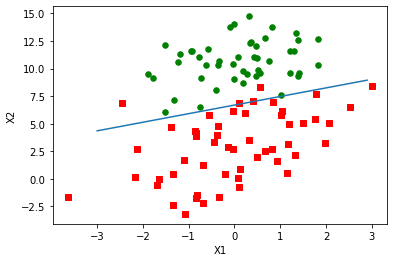

In [2]:
import matplotlib.pyplot as plt

def plotBestFit(weights):
    dataMat, labelMat = loadDataSet()
    dataArr = array(dataMat)
    n = shape(dataArr)[0]
    xcord1 = []
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):
        if int(labelMat[i]) == 1:
            xcord1.append(dataArr[i, 1])
            ycord1.append(dataArr[i, 2])
        else:
            xcord2.append(dataArr[i, 1])
            ycord2.append(dataArr[i, 2])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    x = arange(-3.0, 3.0, 0.1)
    y = (-weights[0] - weights[1] * x) / weights[2]
    ax.plot(x, y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    
weights = gradAscent(dataArr, labelMat)
plotBestFit(weights.getA())

尽管例子简单且数据集很小，这个方法却需要大量的计算（300次乘法）。

## 2.4 训练算法：随机梯度上升

梯度上升算法在每次更新回归系数时都需要遍历整个数据集，该方法在处理100个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，复杂度过高。

一种改进方法是一次仅用一个样本点来更新回归系数，该方法称为随机梯度上升算法。

由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习算法。

与“在线学习”相对应，一次处理所有数据被称作是“批处理”。

随机梯度上升算法可以写成如下的伪代码：

    所有回归系数初始化为1
    对数据集中每个样本：
        计算该样本的梯度
        使用alpha x gradient更新回归系数值
    返回回归系数值

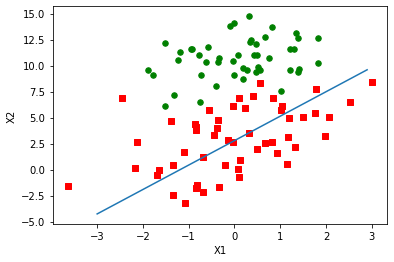

In [3]:
def stocGradAscent0(dataMatrix, classLabels):
    m, n = shape(dataMatrix)
    alpha = 0.01
    weights = ones(n)
    for i in range(m):
        h = sigmoid(sum(dataMatrix[i] * weights))
        error = classLabels[i] - h
        weights = weights + alpha * error * dataMatrix[i]
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights)

直接比较两段代码的结果是不公平的，前者的结果是在整个数据集上迭代了500次才得到的。

一个判断优化算法优劣的可靠方法是看它是否收敛，也就是说参数是否达到了稳定值。

通过观察迭代时参数的变化，发现存在一些不能正确分类的样本点（数据并非线性可分），在每次迭代时会引发系数的剧烈改变。

我们期望算法能避免来回波动，从而收敛到某个值。另外，收敛速度也需要加快。

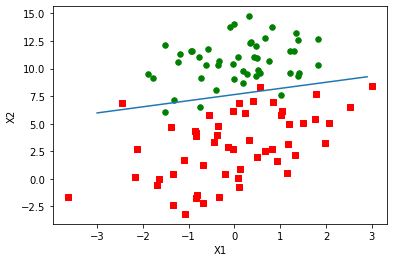

In [5]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m, n = shape(dataMatrix)
    weights = ones(n)
    for j in range(numIter):
        dataIndex = list(range(m))
        for i in range(m):
            alpha = 4 / (1.0 + j + i) + 0.01                    #alpha每次迭代时需要调整
            randIndex = int(random.uniform(0, len(dataIndex)))         #随机选取更新
            h = sigmoid(sum(dataMatrix[randIndex] * weights))
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]
            del dataIndex[randIndex]
    return weights

dataArr, labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights)

对alpha的设置进行了改进，一方面，alpha在每次迭代的时候都会调整，这会缓解数据波动或者高频波动。

另外，虽然alpha会随着迭代次数不断减小，但永远不会减小到0，这是因为增加了一个常数项，必须这样做的原因是为了保证在多次迭代后新数据仍有一定影响。

如果要处理的问题是动态变化的，那么可以适当加大上述常数项，来确保新的值获得更大的回归系数。

另一点值得注意的是，在降低alpha的函数中，alpha每次减少1/(j+i)，其中j是迭代次数，i是样本点的下标。这样当j<<max(i)时，alpha就不是严格下降的。

避免参数的严格下降也常见于模拟退火等其他优化算法中。

# 3. 示例：从疝气病症预测马的死亡率

使用Logistic回归估计马疝病的死亡率：

（1）收集数据：给定数据文件

（2）准备数据：用Python解析文本文件并填充缺失值

（3）分析数据：可视化并观察数据

（4）训练算法：使用优化算法，找到最佳的系数

（5）测试算法：为了量化回归的效果，需要观察错误率。根据错误率决定是否回退到训练阶段，通过改变迭代的次数和步长等参数来得到更好的回归系数

（6）使用算法：实现一个简单的命令行程序

## 3.1 准备数据：处理数据中的缺失值

一些可选的做法：

（1）使用可用特征的均值来填补缺失值

（2）使用特殊值来填补缺失值，如-1

（3）忽略有缺失值的样本

（4）使用相似样本的均值添补缺失值

（5）使用另外的机器学习算法预测缺失值

在预处理阶段需要做两件事：

第一，所有的缺失值必须用一个实数值来替换，这里选择实数0来替换所有的缺失值，恰好能适用于Logistic回归。

因为sigmoid(0) = 0.5，即它对结果的预测不具有任何倾向性。

第二，如果在测试数据集中发现了一条数据的类别标签已经缺失，那么最简单的做法是将该条数据丢弃。

因为类别标签与特征不同，很难确定采用某个合适的值来替换。采用Logistic回归进行分类时是合理的，而如果采用类似kNN的方法就不太行。

## 3.2 测试算法：用Logistic回归进行分类

In [6]:
def sigmoid(inX):
    return exp(inX) / (1 + exp(inX)) if inX < 0 else 1.0 / (1 + exp(-inX))

def classifyVector(inX, weights):
    prob = sigmoid(sum(inX * weights))
    return 1.0 if prob > 0.5 else 0.0

def colicTest():
    trainingSet = []
    trainingLabels = []
    with open('horseColicTraining.txt') as frTrain:
        for line in frTrain.readlines():
            currLine = line.strip().split('\t')
            lineArr = []
            for i in range(21):
                lineArr.append(float(currLine[i]))
            trainingSet.append(lineArr)
            trainingLabels.append(float(currLine[21]))
    trainWeights = stocGradAscent1(array(trainingSet), trainingLabels, 500)
    errorCount = 0
    numTestVec = 0.0
    with open('horseColicTest.txt') as frTest:
        for line in frTest.readlines():
            numTestVec += 1.0
            currLine = line.strip().split('\t')
            lineArr = []
            for i in range(21):
                lineArr.append(float(currLine[i]))
            if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):
                errorCount += 1
    errorRate = float(errorCount) / numTestVec
    print('the error rate of this test is: %f' % errorRate)
    return errorRate

def multiTest():
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print('after %d iterations the average error rate is: %f' % (numTests, errorSum / float(numTests)))
    
multiTest()

the error rate of this test is: 0.417910
the error rate of this test is: 0.402985
the error rate of this test is: 0.388060
the error rate of this test is: 0.268657
the error rate of this test is: 0.373134
the error rate of this test is: 0.388060
the error rate of this test is: 0.343284
the error rate of this test is: 0.373134
the error rate of this test is: 0.313433
the error rate of this test is: 0.507463
after 10 iterations the average error rate is: 0.377612
